In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras

In [2]:
train_dir = r'E:\Minor Project\PlantVillage(1)\train'
validation_dir= r'E:\Minor Project\PlantVillage(1)\val'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory (
                train_dir,
                target_size=(256,256),
                batch_size=32,
                class_mode="binary")
validation_generator = test_datagen.flow_from_directory (
                validation_dir,
                target_size=(256,256),
                batch_size=32,
                class_mode="binary")

Found 30591 images belonging to 2 classes.
Found 9759 images belonging to 2 classes.


In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [6]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation='relu',
         input_shape=(256,256,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu'))

model.add(layers.Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       1

In [8]:
from tensorflow.keras import optimizers

model.compile (loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [9]:
history  = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=50,
validation_data=validation_generator,
validation_steps=50)

C:\Users\asus\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
100/100 [==============================] - 210s 2s/step - loss: 0.5433 - acc: 0.7362 - val_loss: 0.4089 - val_acc: 0.8169
Epoch 2/50
100/100 [==============================] - 188s 2s/step - loss: 0.4388 - acc: 0.7847 - val_loss: 0.3770 - val_acc: 0.8100
Epoch 3/50
100/100 [==============================] - 189s 2s/step - loss: 0.3713 - acc: 0.8200 - val_loss: 0.3233 - val_acc: 0.8606
Epoch 4/50
100/100 [==============================] - 193s 2s/step - loss: 0.3516 - acc: 0.8428 - val_loss: 0.2841 - val_acc: 0.8788
Epoch 5/50
100/100 [==============================] - 186s 2s/step - loss: 0.3086 - acc: 0.8678 - val_loss: 0.3133 - val_acc: 0.8706
Epoch 6/50
100/100 [==============================] - 184s 2s/step - loss: 0.2735 - acc: 0.8869 - val_loss: 0.2457 - val_acc: 0.8900
Epoch 7/50
100/100 [==============================] - 183s 2s/step - loss: 0.2531 - acc: 0.8919 - val_loss: 0.2686 - val_acc: 0.8756
Epoch 8/50
100/100 [==============================] - 174s 2s/step - 

In [10]:
model.save("leaf_disease_detection_4.h5")

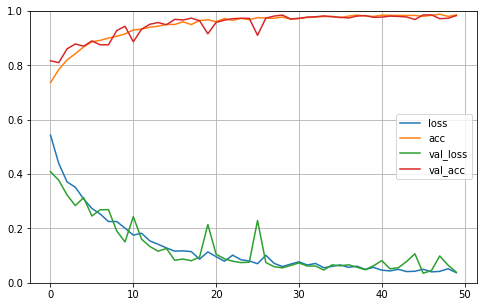

In [11]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()